# COGS 118A- Final Project

# Names

- Jerry Wang, A16149329
- Darius Azure, A15786330
- Miko Brown, A16237566


# Abstract 
Music has been created over thousands of years, people considered music as an expression of beauty, aesthetics, and art. However, it is rare to see people apply modern technology to analyze music. We want to explore the secret of music with a more scientific and computational way.

The goal of our project is to classify song genre based on a variety of features describing the music. Our project tackles the problem of classifying song genre based on many variables including artist, song name, popularity, acousticness, danceability, energy, instrumentalness, key, tune, etc. 

The data contains entries with each of these features and their musical genre. We will create pipeline models to perform multi-classification on genre in the dataset. By comparing performance and metrics from different models, we will pick the highest accuracy algorithm by comparing the metrics from each one.

In this project, we will select model among(not limited to)Logstic Regression, SVM, Random Forest, Boosting, and Neural Network.

In this project, we will use $f_1$ score to determine which model has the best performance. We will investigate precision and recall individually as well, but $f_1$ score will be the determining metric.

# Background

In the history of music, there was no such complex system to define music genre in earlier times. It was more simple to categorize music according to its period of time<a name="wiki1"></a>[<sup>[1]</sup>](#wikinote1). After the 20th century, creative musicians brought different format of music to the stage so that people start to categorize the music into genres. The music genre becomes more complicated as the technology develops. Nowadays, when facing countless music work, we cannot categorize a genre from its time. Instead, we may need to determine the music category based on its features, attributes, and listening response. 

A music genre or subgenre may be defined by the musical techniques, the cultural context, and the content and spirit of the themes<a name="wiki2"></a>[<sup>[2]</sup>](#wikinote2). This article describes how many people subjectively view genre of music. This is useful for human-being, but difficult to classify large datasets of songs without listening to and understanding each song in depth. We can find that music genre itself is not easy to identified by individual factors from listening since people may have subjective thoughts. We tend to believe that there exists some more objective methods in machine learning to categorize music genre with computer algorithms.

Additionally, music genre is a dynamic concept. Due to the natural evolution of music, it may appear differently in differnt periods of time. Therefore, a listening response might be outdated if a genre is gradually disappearing or shifting to different formats<a name="newyorker"></a>[<sup>[3]</sup>](#newyorkernote). In contradiction, data implementation will not be affected by such evolution since data is measure objectively during that time period and measures a fixed in-time genre rather than a dynamic genre shifted from earlier times. For instance, the general keys of Jazz music in 1900s are different with Jazz music in 2020, but the computer will filter out the era's influence on keys.

# Problem Statement
Given different attributes of one song, what is its genre?

The problem is quantifiable, we can represent the problem as:

- Denote song entries $x_1$ to $x_n$ as X
- Denote song genre $y_1$ to $y_n$ as y
- Given $x_1$ to $x_n$, each $\vec x_i$ $\in \mathbb{R}^d$ with features $f_1$ through $f_d$. What is $\bar y_i$?

ML-relevant potential solution: Give $x_1$ to $x_n$, by applying either LogisticRegression, RandomForest, Boosting, and Neural Network, the model produces the prediction of its most likely class $y_i$.

The problem is measurable since we can evaluate the quantitative prediction performance with precision, recall, and f1 score.

The problem is replicable since our selected algorithms are generally deterministic, once the data of a song is obtained, the problem can be reproduced by applying the same algorithms.

# Data

- source: interest in music, general search online for datasets; [author](https://www.kaggle.com/vicsuperman) is from Wellington, New Zealand; the origin source of the data is unknown, we only grab it from Kaggle platform

- reference: [Kaggle](https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre), dataset search under classification

- description dataset: 17 of variables, 49944 of observations

- an observation consists of: instance_id, artist_name, track_name, popularity, acousticness, danceability,  duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, obtained_date, valence, music_gengre

- Actually we are not sure what should be considered as critical variables since any of the attributes of a song can make huge differernce to the song. Generally, the variables are presented in numerical values and categorical values and contains missing data.

- cleaning of extreme numerical values, unmatched type, different format of categorical values

- data missingness: if the data contains missing value, we need to first examine its type: Missing Completely At Random (MCAR), Missing At Random (MAR), or Missing Not At Random (MNAR). Then, we need to apply the strategy from one of the following: 1. ignore missingness 2. fill with special value 3.fill with mean/median 4.fill with nearest data 5.fill with our model prediction. This decision will be further determined in the data part if we encounter data missing.


package import and data load

In [1]:
# basic import for data
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#read data in dataframe
df = pd.read_csv("music.csv", header=0)
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
#check shape of dataframe
df.shape

(50005, 18)

check missingness

In [4]:
#check for missing data
if df.isnull().values.any():
    warnings.warn("missing data")

#print number of missing entries
print(df.isnull().sum().sum())

90


C:\Users\mikob\AppData\Local\Temp\ipykernel_14172\566493410.py:3: UserWarning: missing data
  warnings.warn("missing data")


There are some missing data, we checked our dataframe and found those missings are completely random for specific data points, so we decided to ignore them. We will update the decision in the future if necessary. Additionally, we decided to drop the "obtained_date" since it is just the date to obtain or receive this music, but not the date of release. So, it is totally irrelerant.

In [5]:
#drop missing data
df = df.dropna()
# drop obtained_date: the date when this music piece is collected, irrelavant in this data
df = df.drop(columns=['obtained_date'])

We might need to convert features into correct types for models later.

We find that in **tempo** column, there are some **?**, since the missing reason is unknown and sometimes a music temp is unknown when the source is unknown, we will ignore it.

In [6]:
#drop rows that have tempo equal to ?
df = df[df["tempo"] != "?"]
df.shape

(45020, 17)

Quantitaive feature: popularity, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, mode, speechiness, tempo, valence, 12 features in total

Categorical feature: key, mode, 2 features in total

Unrelated feature: instance_id, artist_name, track_name, 3 features in total

One result label: music_genre

18 columns = $12+2+3+1$.

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Why might your solution work? Make sure to describe how the solution will be tested.

Given $x_1$ to $x_n$, each $\vec x_i$ $\in \mathbb{R}^d$ with features $f_1$ through $f_d$. Predict 
the most likely class $y_i$.

The solution is applicable and appropriate since:
- Given features and observations, a multi-class classification is appropriate for this dataset since our true music genre has different categorical values.
- We will build different models to produce the prediction, for example(not limited to) KNN, SVM, Neural Networks, Decision Trees, Gradient Boosting... The performance will be evaluated quantitatively.
- We will use (repeated) K-fold cross validation to split test data and test our model performace with accuracy.
- Comparision through models will be performed.

Model selection:
- We selected these models based on our multi-class classification(not limited to): LogisticRegression, RandomForest, Boosting, and Neural Network
- We will use LogisticRegression as a baseline model because it's predictive power is relatively low but it is easier to understand, we will present a trial and get a basic understanding of multi-label classification.
- RandomForest is a ensemble learning of decision trees, it is easy to understand and interpret. This will make our algorithm easier to visualize to give context to how it makes it's decision.
- Boosting is another ensemble learning but different with bagging(forest), it allows us to improve and boost the weak learner from previous and focus on more mis-classified data.
- Neural network is our exploration, NN is large and complicated. We want to implement a rough network within a medium size of neurons and present a solid output.
<!-- ![image-3.png](attachment:image-3.png) -->

# Evaluation Metrics

For our project we have chosen to focus on the evaluation metrics of precision, recall, and f1 score which we will use to try to evaluate how well our project is predicting the music genre. Due to having to store our data in a measurable way through our data cleaning to be quantifiable we need to see if we are handling these new variables are correctly being measured in a way where important comparisons have the proper weights. Since we need the project to be measurable we need to see that these variables that we cleaned are being weighed correctly which is why we will use f1 to try to compare our prediction of our training set to the actual genre to try to measure how many true postives and true negatives we have in our predictions in order to see how accurate our predictions are. We will use precision to determine how good we are at classifying a sample positively (quality of positive predictions). We will use recall to determine how good we are at detecting positive samples.

We can also compare these scores to try to see if there is any overlap between predicting certain genres and see if our different models have more power in predicting these songs better than others depending on our score that we get. In general using these different factors that we have deemed quantifable we should check if we correctly measured the weight of these factors and see how truly we were able to identify the genre. 

# Visualization

We implemented some examples of visualization, might expand more later after we begin some models.

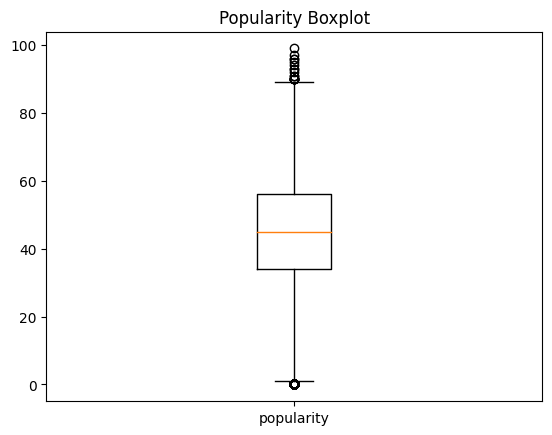

In [7]:
#box plot of popularity
plt.boxplot(df['popularity'], autorange=True, labels=['popularity'], manage_ticks=True, meanline=True)
plt.title('Popularity Boxplot')
plt.show()

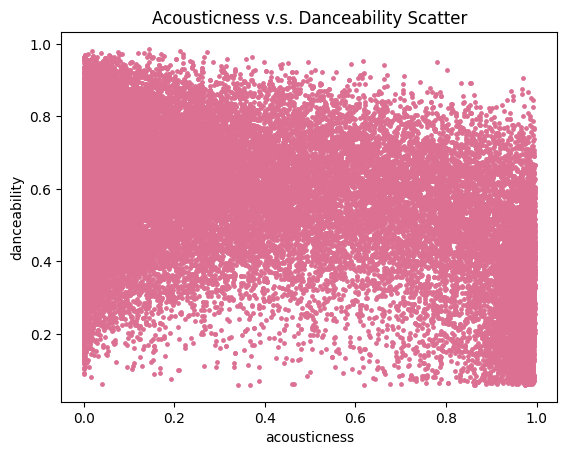

In [8]:
plt.scatter(df['acousticness'], df['danceability'], s=6, color=['palevioletred'], label='asd')
plt.xlabel('acousticness')
plt.ylabel('danceability')
plt.title('Acousticness v.s. Danceability Scatter')
plt.show()

We firstly tend to believe that there exists a linear relationship between **acousticness** and **danceability**, but it seems the range of data falls everywhere, so there is no such obvious association.

Since the key is the only categorical feature that contains about 10 keys, we want to look at its visual relationshuip with the final genre.

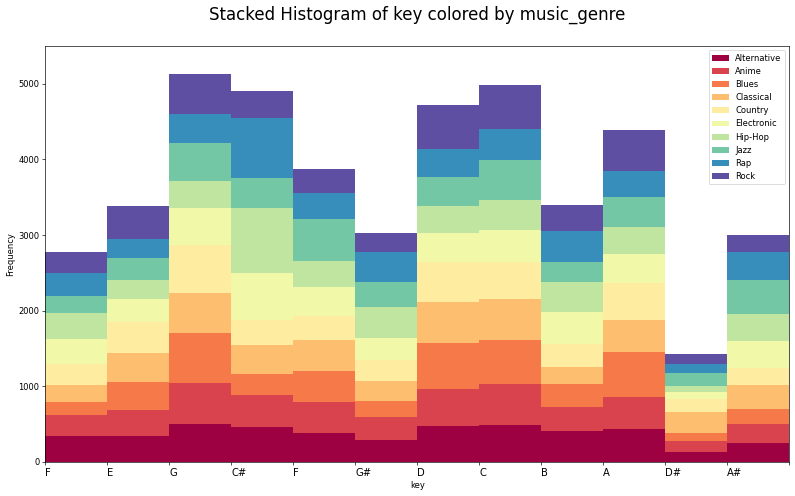

In [9]:
x_var = 'key'
groupby_var = 'music_genre'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
plt.figure(figsize=(16,9), dpi=60)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])
# Design
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title("Stacked Histogram of key colored by music_genre\n", fontsize=20)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xlim(0, 11)
plt.ylim(0, 5500)
plt.xticks(ticks=bins, labels='F,E,G,C#,F,G#,D,C,B,A,D#,A#,'.split(','), va='top', ha='left', size=12)
plt.show()

We found that for each key, the music genre given that key is distributed generally and evenly. It is so difficult to find a pattern for music genre given the key, this means that using a key to predict genre is not convincing enough, so we will **not** use key as the main categorical feature. We asked our music major friends, the response is that a composer may not only focus on one key to produce one genre, the composer tends to find the inspiration and then confirm the key later on. In our project, if necessary, we will include it in futre model evaluations. 

Then, we want to explore the correlation betweeen each features.

C:\Users\mikob\AppData\Local\Temp\ipykernel_14172\3466331845.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),linewidths=0.1, annot=True,cmap='YlGn')


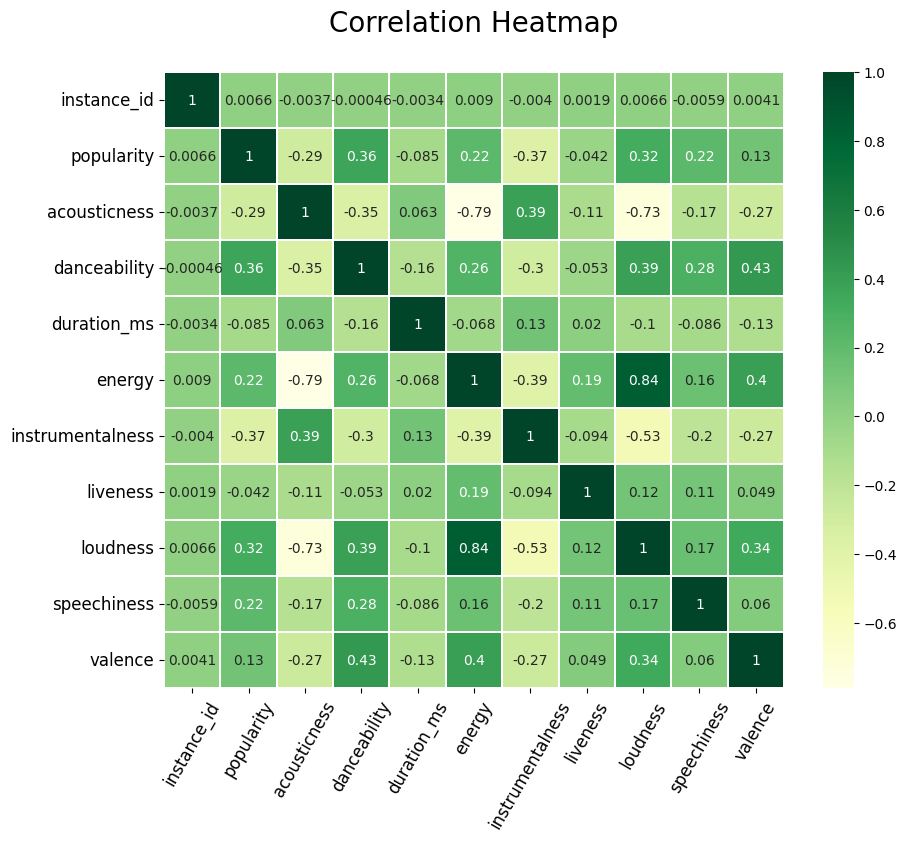

In [10]:
data = df
plt.figure(figsize=(10, 8))
key_list = df.columns
sns.heatmap(data.corr(),linewidths=0.1, annot=True,cmap='YlGn')
plt.title('Correlation Heatmap\n', size=20)
plt.xticks(fontsize=12, rotation=60) 
plt.yticks(fontsize=12, rotation=0) 
plt.show()

# Models

## Logistic Regression

To start with, we decided to perform simple logistic regression to give a basic sense of this muli-laebl classification. We expect the result to be bad($\leq$ 40%), we will implement more models later on after this checkpoint.

In [11]:
#drop non-numeric columns for basic baseline logistic regression model for our first trial
df_lr = df.copy()
df_lr = df_lr.drop(columns=['instance_id', 'artist_name', 'track_name', 'key', 'mode'])
cols = df_lr.columns
correct_types = [float, float, float, float, float, float, float, float, float, float, float, str]
cols_dict = dict(zip(cols, correct_types))
for col in cols_dict:
    df_lr[col] = df_lr[col].map(cols_dict[col], na_action='ignore')
df_lr.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,Electronic


This is done by the checkpoint, we will include categorical features in future models.

In [12]:
#check no missing data
if df_lr.isnull().values.any():
    warnings.warn("missing data")
df_lr.isnull().sum().sum()

0

In [13]:
#new shape of well-formed data
df_lr.shape

(45020, 12)

In [14]:
from sklearn.model_selection import train_test_split
#extract X and y from dataset to create train test split
X = df_lr.iloc[:,:-1]
y = df_lr.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#check shape of train and test split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30163, 11)
(14857, 11)
(30163,)
(14857,)


In [15]:
from sklearn.linear_model import LogisticRegression

#train baseline logistic regression model
clf = LogisticRegression(C=1, random_state=0, penalty='l2', multi_class='multinomial', max_iter=1000).fit(X_train, y_train)


In [16]:
#Evaluate performance on test set
predicted = clf.predict(X_test)

#get f1 score for baseline model
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted, average="micro"))

0.29588746045635056


### Reflection on the first attempt

The accuracy is roughly the same as we expected, we know that multi-labels classification needs other models that can perform better than logistic regression.

After the result of logistic regression, we decided to implement the ensemble learning models and the neural networks. We will implement the Random Forest, the

**TODO**___ 

Boosting, and the Neural Networks, and then compare and evaluate their performance.

#### =================================================================================================================
This cell is used for **Random Forest Starting Dividing**, create anything below **🠳** this cell, so when you push onto github, the start of **new-changed cells** should be on this cell. Delete this cell at final combination or final review.
#### =================================================================================================================

## Random Forest

Add description here...

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
df_rf = df.copy()
print("missing:", df_rf.isnull().sum().sum())
print("shape:", df_rf.shape)
df_rf.head()

missing: 0
shape: (45020, 17)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [19]:
keys = df_rf['key'].unique()
sorted(keys)

modes = df_rf['mode'].unique()
sorted(modes)

df_rf = df_rf.drop(columns=['instance_id', 'artist_name', 'track_name', 'key'])
df_rf['mode'] = df_rf['mode'].apply(lambda x: 1 if x == 'Major' else 0)

In [20]:
cols = df_rf.columns
#df_rf = df_rf.drop(columns=['instance_id', 'artist_name', 'track_name', 'key', 'mode'])
cols = df_rf.columns
correct_types = [float, float, float, float, float, float, float, float, float, float, float, float, str]
cols_dict = dict(zip(cols, correct_types))
for col in cols_dict:
    df_rf[col] = df_rf[col].map(cols_dict[col], na_action='ignore')
df_rf.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,1.0,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,1.0,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,1.0,0.0413,145.036,0.323,Electronic


In [21]:
X = df_rf.iloc[:,:-1]
y = df_rf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#check shape of train and test split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30163, 12)
(14857, 12)
(30163,)
(14857,)


In [22]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
#Evaluate performance on test set
predicted = clf.predict(X_test)

#get f1 score for baseline model
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(f1_score(y_test, predicted, average="micro"))
precision = precision_score(y_test, predicted, average='micro')
print('precision: %f' % precision)
recall = recall_score(y_test, predicted, average='micro')
print('recall: %f' % recall)

0.5562361176549775
precision: 0.556236
recall: 0.556236


1. Make sure to have some explanation for large chunk of codes, or separate into smaller ones for better description, and also explain metrics and performannce after the output.

2. Try to control the ratio of code and words, the golden ratio is around 10:1 or less (10 lines of codes + 1 block of explanation)

3. Visualization and simple implementation is always good.

4. Make sure to remain independence, the following cell gives a demo:

In [24]:
# df is our raw data, Don't do(this will influence data outside this model)
# df = df.iloc[...]
# xxx = df[aa]
# yyy = df[bb]
# df.apply[xxx]
# df.map(yyy)
# rf = RandomForest(data=df, xx=True, xx='None')
# rf.fit(xxx)
# =====================================================
# Do: (variable names can be different, also modify the new dataframe to prevent)
# df_rf = df.iloc[...]
# df_rf = ...
# return df_rf.describe()
# print(df_rf.stats)

After receiving the result, create a cell of conclusion here: In the model, ...

#### =================================================================================================================
This cell is used for **Random Forest Ending Dividing**, create anything above **🠱** this cell, so when you push onto github, the end of **new-changed cells** should be on this cell. Delete this cell at final combination or final review.
#### =================================================================================================================

#### =================================================================================================================
This cell is used for **Boosting Starting Dividing**, create anything below **🠳** this cell, so when you push onto github, the start of **new-changed cells** should be on this cell. Delete this cell at final combination or final review.
#### =================================================================================================================

## XX Boosting

Add description here...

Similar as above

#### =================================================================================================================
This cell is used for **Boosting Ending Dividing**, create anything above **🠱** this cell, so when you push onto github, the end of **new-changed cells** should be on this cell. Delete this cell at final combination or final review.
#### =================================================================================================================

#### =================================================================================================================
This cell is used for **NN Starting Dividing**, create anything below **🠳** this cell, so when you push onto github, the start of **new-changed cells** should be on this cell. Delete this cell at final combination or final review.
#### =================================================================================================================

## Neural Network

As introduced in lectures and also [neural network playground](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-gauss&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.95155&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false), we decide to try out the implementation of a relative-simple neural network. 

**Note: This neural network is an exploration since we are not sure whether we can tune a solid network from 40k data within one week, so please grade our design and implementatin more. Thank you.**

In [25]:
# import package
# for data
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.utils import shuffle

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df_n = df.copy()
print("missing:", df_n.isnull().sum().sum())
print("shape:", df_n.shape)

missing: 0
shape: (45020, 17)


No missing exists. Then we want to one-hot encoding the categorical features. Take a look at them and do one-hot encoding via sklearn

In [ ]:
keys = df_n['key'].unique()
sorted(keys)

['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

In [ ]:
modes = df_n['mode'].unique()
sorted(modes)

['Major', 'Minor']

Key has over 12 unique values, we all agree that this key will have little influence on the genre since the key of a music does not reflect any information, so we will do Sklearn One-Hot Encoder on **mode**.

In [ ]:
df_n = df_n.drop(columns=['instance_id', 'artist_name', 'track_name', 'key'])
df_n['mode'] = df_n['mode'].apply(lambda x: 1 if x == 'Major' else 0)

In [ ]:
df_n.shape

(45020, 13)

Conver type of **tempo** into float.

In [ ]:
df_n['tempo'] = df_n['tempo'].map(float)

Convert duration **unit** from ms to min.

In [ ]:
df_n['duration_ms'] = df_n['duration_ms'].apply(lambda x: np.round(x/60000, 3))
df_n = df_n.rename(columns={'duration_ms':'duration'})

In [ ]:
one_data = df_n.iloc[118,:]
for i in range(len(one_data)):
    if type(one_data[i]) not in [np.dtype('float64'), np.dtype('int64')]:
        print("Not numerics:", df_n.columns[i])

Not numerics: music_genre


Now, every feature is numeric, we round the decimal into 3 digits.

In [ ]:
df_n = df_n.round(3)

The above data is ready to implement neural networks. Firstly, shuffle the dataframe to break the continuous labels.

In [ ]:
# shuffle dataset
df_nn = shuffle(df_n, random_state=42)
print(df_nn.shape)
df_nn.head()

(45020, 13)


,popularity,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
48115,58.0,0.157,0.918,2.829,0.834,0.0,0.065,-6.210,1,0.094,128.006,0.842,Hip-Hop
26320,53.0,0.360,0.600,4.521,0.619,0.0,0.106,-9.709,0,0.202,103.908,0.308,Rap
45661,66.0,0.054,0.803,4.879,0.640,0.0,0.342,-4.527,0,0.028,131.986,0.038,Hip-Hop
5294,12.0,0.038,0.559,3.602,0.980,0.0,0.335,-2.184,0,0.239,178.020,0.536,Anime
22733,39.0,0.082,0.660,2.924,0.845,0.0,0.319,-7.032,1,0.039,138.430,0.861,Country


After we ran the first time of our 3 laye neural network, we found that training a neural network on 40000 data takes about 25 minutes to fit the model. After fully consideration about running time, we decide to abandon the k-fold cross validation to split the test and train set. That is if we use k=5, we need to train up to 5 models which will cause up to 2.5 hours for one iteration of running the notebook. Instead, we use the sklean shuffle to shuffle the dataset and pick the first 35000 data as train. We know that this shuffle will create some sort of bias, we  selected the shuffle since a training set of size 35000 will decrease the bias generally. In conclusion, We will use first 35000 as train data, the rest as test set.

**We apologize for the skip of k-fold cross validation but running several normal neural networks in one iteraion will take the entire day off, and we still need to optimize its hyperparameters in the future.**

In [ ]:
X_nn = np.array(df_nn.iloc[:,:-1])
y_nn = np.array(df_nn.iloc[:,-1])

Encode Y label into numerical values.

In [ ]:
'''encode label'''
print(set(y_nn), "\n number of labels:", len(set(y_nn)))
encoder = LabelEncoder()
encoder.fit(y_nn)
encoded_Y = encoder.transform(y_nn)
y_nn = np_utils.to_categorical(encoded_Y)

{'Blues', 'Anime', 'Alternative', 'Jazz', 'Rock', 'Rap', 'Electronic', 'Classical', 'Country', 'Hip-Hop'} 
 number of labels: 10


In [ ]:
'''Select first 35000 data as training'''
test_size = 35000
X_train_nn, X_test_nn = X_nn[:test_size, :], X_nn[test_size:, :]
y_train_nn, y_test_nn = y_nn[:test_size], y_nn[test_size:]

The categorical y should be shape of (45020, 10) since there 10 labels. Now we can begin the trainning. Create model here.

In [ ]:
def create_model_one():
    '''base model here'''
    model = Sequential()
    model.add(Dense(12, input_shape=(X_train_nn.shape[1],), activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    '''grid search for batch_size and epoch, so need to compile'''
    # compile
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', # instead of binary_crossentropy
                  metrics=['accuracy'])
    return model

In [ ]:
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
model = KerasClassifier(model=create_model_one, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_nn, y_train_nn)

In [ ]:
'''evaluate the performance'''
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.527543 using {'batch_size': 10, 'epochs': 100}
0.510514 (0.004294) with: {'batch_size': 10, 'epochs': 50}
0.527543 (0.005750) with: {'batch_size': 10, 'epochs': 100}
0.508200 (0.015740) with: {'batch_size': 20, 'epochs': 50}
0.515800 (0.013519) with: {'batch_size': 20, 'epochs': 100}
0.482086 (0.030856) with: {'batch_size': 40, 'epochs': 50}
0.508800 (0.014968) with: {'batch_size': 40, 'epochs': 100}


Use the best parameter to fit model.

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(X_train_nn.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', # instead of binary_crossentropy
                  metrics=['accuracy'])
model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=10, verbose=0)

Now we need to use test set to evaluate metrics.

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
y_true = np.argmax(y_test_nn, axis=1)

In [ ]:
y_pred_probs = model.predict(X_test_nn, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

Precision and F1 score

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(y_true, y_pred, average='micro')
print('precision: %f' % precision)
f1 = f1_score(y_true, y_pred, average=None)
print("complete f1:", f1)
f1_micro = f1_score(y_true, y_pred, average='micro')
print('micro f1: %f' % f1_micro)
f1_macro = f1_score(y_true, y_pred, average='macro')
print('macro f1: %f' % f1_macro)

precision: 0.534731
complete f1: [0.30095759 0.67771819 0.49017682 0.82154171 0.43912176 0.57974138
 0.51480263 0.49360493 0.36507042 0.59280695]
micro f1: 0.534731
macro f1: 0.527554


As we can see, the f1 score is not high, it stays around 0.54, a medium precision score (around 0.5 - 0.7) means the classifier has a small portion number of False Positives and True negatives. 

0.54 precision means we given 10000 test size, we predict around 5500 of them into the correct music genre.

To a multi-class classification, F-1 score is preferable when we have imbalanced class distribution or we are looking for a balanced measure between precision and recall. We found that clearly, the neural network need more tuning and optimization since this dataset size is not small compared to our computer's size. This network's epochs, optimizer, momentum, and the hidden layer settings can be better. Unfortunately, we have a time limit during the final week, so further improvement might be developed in the future. 

Model-wise, in the training set, the best score of grid search accuracy is around 0.54, which is not high enough as well. We are not sure that given a 13 feature input and 10 label neurons output, what size of hidden layer should be better. We have to say that we did it with only 1 hidden layer, but with 2 or 3 hidden layers that contain less hidden neuron, the performance might be better. The only restriction is the time. We ran the 2 layers that have 6 neurons each, it took around 45 min to complete the model. And this is kind of impossible to apply the grid search on it, so we choose to use a simpler one and perform the grid search.

This is our first trial of tuning a neural network. The running time is pretty long, that each fit of data will take more than 20 minutes. This is understandble since the data size is not small. How to speed up the model is one of our questions in the future. Despite of the result, we explore the secret of neural network. Hope we can be better next time.

#### =================================================================================================================
This cell is used for **NN Ending Dividing**, create anything above **🠱** this cell, so when you push onto github, the end of **new-changed cells** should be on this cell. Delete this cell at final combination or final review.
#### =================================================================================================================

# Conclusion

# Improvement and Reflection

# Ethics & Privacy

Due to the fact that each song labeled with artist and the name of the song there is the problem of these being identifable and since this data is likely not important to our analysis we will not reflect specific songs in our analysis and try to avoid biases due to song selections in our fold selection to the best of our ability. We will have our data highlight only the important aspects of the analysis that will not have identifiable links back to the data. We will have the songs instead represented as meaningless id code labels that will have no relation to the song or artist themselves to avoid potential bias in our data analysis and will instead focus on the other factors about the songs to focus instead on predicting the genre based on those quantifiable aspects rather than inherit biases we may unintentionally have if we based it on song or artist names. Due to the nature of us scrapping data that we ourselves did not collect we will comb through the data to make sure that there are no ethical issues with the data collection and that there is no bias to what was collected and that there is no PIID values that may have been collected in the data as discussed earlier. We will make sure that all genres are properly represented in valid ways and that our data analysis relys on purely numerical data that is comparable rather than our own bias. Furthermore if any ethical dilemas come up during or after our research we plan on adjusting our data to handle or remove ethical concerns within our modeling and deployment of the analysis. We will have our data in comparable and categorical matter where we weigh our data properly but if these factors are found to not be properly utilized or have a bias that affects our ethics we will try to reflect this in our final project.

Also, classifying music genre is a process about classifying music and making people more aware of music, which does not involve any extreme,  negative,  or positive evaluations. All output results, regardless of real facts, are objective from computer evaluation and will not negatively mislead society or the public. Further, we will also state that this scientific classification is only used as a reference in machine learning. When people are really willing to try to get in touch with music genre, they should consider everything comprehensively from both objective facts and subjective opinions. 

We all believe **Appreciation and Analysis of Music requires both rationality and sensibility**.

# Team Expectations 

* Be nice and supportive.
* Communicate through Discord, respond in time.
* Reach agreement to changes.
* Ask for help if necessary, help if you can.
* Vote for conflicts.
* Don't delete anything without permission except individual scratch.
* Finish as our schedule.

# Project Timeline

Rough time plan:

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/17  |  2 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss final project topic; Discuss hypothesis; Dackground research; Build proposal | 
| 2/22  | 2 PM  | Edit, finalize, and submit proposal; Search for datasets   | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/28  |  2 PM |  Start data import | Discuss ideal dataset(s) and ethics; Load data; Find relevant music knowledge; Solve potential concerns | 
| 3/7  | 2 PM  | Import & Wrangle Data ,do some EDA  | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/14  | 2 PM  | Finalize wrangling/EDA; Begin programming for project  | Discuss/edit project code; Complete project |
| 3/21 | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="wikinote1"></a>1.[^](#wiki1): (16 February 2023) History of Music Wikipedia. https://en.wikipedia.org/wiki/History_of_music<br>
<a name="wikinote2"></a>2.[^](#wiki2): (9 February 2023) Music genre Wikipedia https://en.wikipedia.org/wiki/Music_genre#:~:text=A%20music%20genre%20or%20subgenre,a%20wide%20variety%20of%20subgenres<br>
<a name="newyorkernote"></a>3.[^](#newyorker): (15 March 2021) Genre Is Disappearing. What Comes Next? https://www.newyorker.com/magazine/2021/03/15/genre-is-disappearing-what-comes-next